# Dependencies

In [ ]:
## uncomment this cell if run in colab ##

#%%capture
#pip install --upgrade git+https://github.com/meichenfang/velocyto.py.git
#pip install scanpy umap-learn

#!git clone https://github.com/pachterlab/GFCP_2021.git
#!cd GFCP_2021
#from vis import * 

In [1]:
## run locally ##
%cd ../../GFCP_2021
from vis import * 
%cd notebooks

/Users/fang/OneDrive - California Institute of Technology/Caltech/Research/Pachter/RNA velocity/What_is_RNA_velocity/GFCP_2021


In /Users/fang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/fang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/fang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/fang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/fang/opt/anaconda3/lib/python3.7/site-

/Users/fang/OneDrive - California Institute of Technology/Caltech/Research/Pachter/RNA velocity/What_is_RNA_velocity/GFCP_2021/notebooks


# Load data and preprocess

In [2]:
vlm = vcy.VelocytoLoom(loom_filepath="data/hgForebrainGlut.loom")
preprocess(vlm)

# Generate figure 8

/Users/fang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Nan values in corrcoef, setting them to 0
/Users/fang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Nan values in corrcoef, setting them to 0


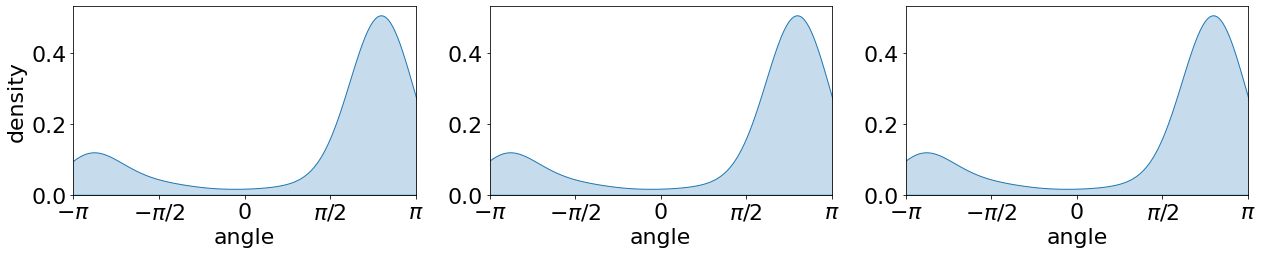

In [14]:
plt.rcParams.update({'font.size': 22})
fig, frac=angleDevPlots(vlm,Trans=["sqrt","log","linear"],n_neighs=[0])

In [16]:
fig.legend(loc=(1,1.2))
fig.show()

/Users/fang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


In [6]:
fig.savefig('../figure/figure_8.png',dpi=600)

In [13]:
def plotTheta(ax, X, Y, k):
    '''
    Single angle deviation plot
    '''
    angle1=np.arctan2(X[:,1],X[:,0])
    angle2=np.arctan2(Y[:,1],Y[:,0])
    angle=angle2-angle1
    angle=angle %(2*math.pi)
    angle[angle>np.pi]=angle[angle>np.pi]-2*np.pi
    sn.kdeplot(data=angle,shade=True,ax=ax,label=str(k))
    #ax.hist(angle,density=True,label=str(k),alpha=0.2)
    ax.set_xlabel("angle")
    ax.set_xlim([-np.pi, np.pi])
    ax.set_xticks(np.arange(-np.pi, np.pi+0.01, np.pi/2))  
    labels = [ r'$-\pi$', r'$-\pi/2$', '$0$',  r'$\pi/2$', r'$\pi$']
    ax.set_xticklabels(labels)
    return np.sum(np.abs(angle)>np.pi/2)/len(angle)


def angleDevPlots(vlm,Trans,n_neighs):
    '''
    Plot angle deviations from transformations over varying neighbors for embedding (only compared to baseline)
    
    Parameters
    ----------

    Returns
    -------
    '''
    if not hasattr(vlm,"delta_S"):
        getImputed(vlm, knn_k=50)
    fig, ax= plt.subplots(1, len(Trans),figsize=(len(Trans)*6,4))
    baseline_arrow=linear_embed(vlm)
    frac=np.zeros((len(Trans),len(n_neighs)))
    
    for j, k in enumerate(n_neighs):
        for i,trans in enumerate(Trans):
            vlm.estimate_transition_prob(hidim="Sx_sz", embed="pcs", transform=trans,
                                          n_neighbors=k, knn_random=False, sampled_fraction=1)
            if np.count_nonzero(np.isnan(vlm.corrcoef))>0:
                warnings.warn("Nan values in corrcoef, setting them to 0")
                vlm.corrcoef[np.isnan(vlm.corrcoef)]=0
                
            vlm.calculate_embedding_shift(sigma_corr = 0.05, expression_scaling=False)
            
            frac[i,j]=plotTheta(ax[i], baseline_arrow, vlm.delta_embedding, k)
    
    ax[0].set_ylabel("density")
    ax[1].set(ylabel=None)
    ax[2].set(ylabel=None)
    fig.tight_layout()
    
    return fig, frac
